In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from matplotlib.colors import ListedColormap


In [2]:
# Generate synthetic dataset
X, y = make_classification(n_samples=300, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Function to plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])

    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolors='k', marker='o', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Step 5: Model Training and Prediction
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)


In [6]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.95
Confusion Matrix:
[[28  1]
 [ 2 29]]


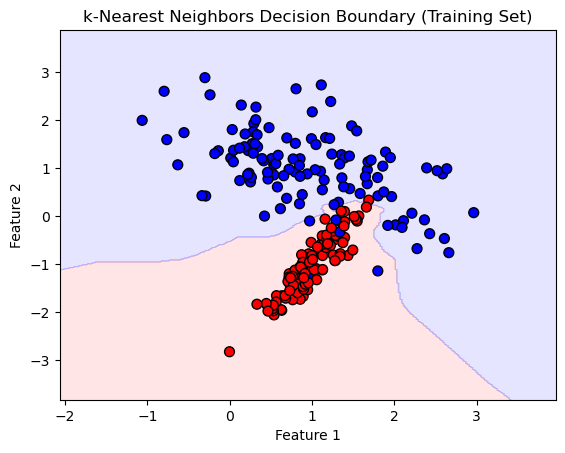

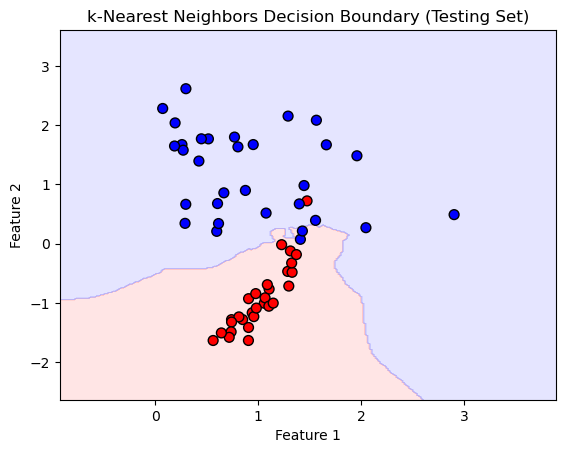

In [7]:
# Visualize decision boundaries
plot_decision_boundary(X_train, y_train, knn_classifier, 'k-Nearest Neighbors Decision Boundary (Training Set)')
plot_decision_boundary(X_test, y_test, knn_classifier, 'k-Nearest Neighbors Decision Boundary (Testing Set)')


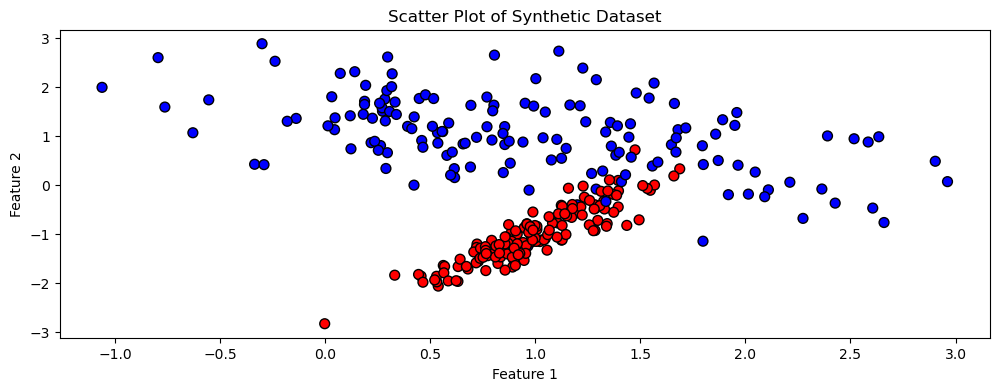

In [9]:
# 1. Scatter Plot of the Synthetic Dataset
plt.figure(figsize=(12, 4))

# Define the colormap for data points
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolors='k', marker='o', s=50)
plt.title('Scatter Plot of Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


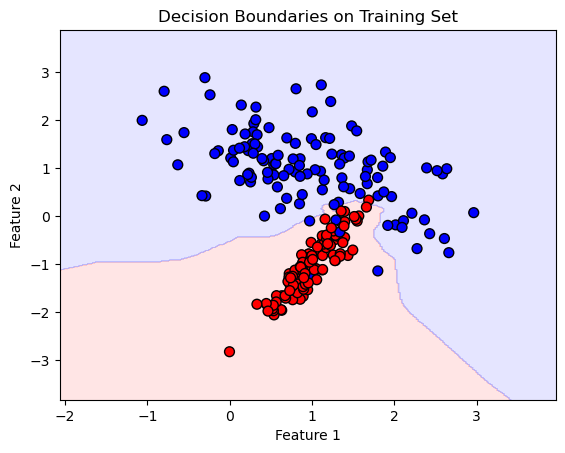

In [10]:
# 2. Decision Boundaries on the Training Set
plt.figure()
plot_decision_boundary(X_train, y_train, knn_classifier, 'Decision Boundaries on Training Set')


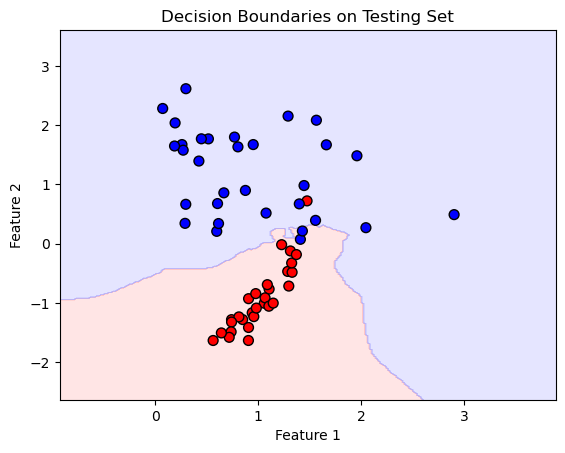

In [11]:
# 3. Decision Boundaries on the Testing Set
plt.figure()
plot_decision_boundary(X_test, y_test, knn_classifier, 'Decision Boundaries on Testing Set')


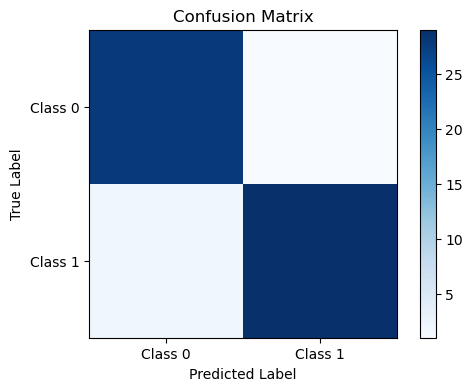

In [12]:
# 4. Confusion Matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


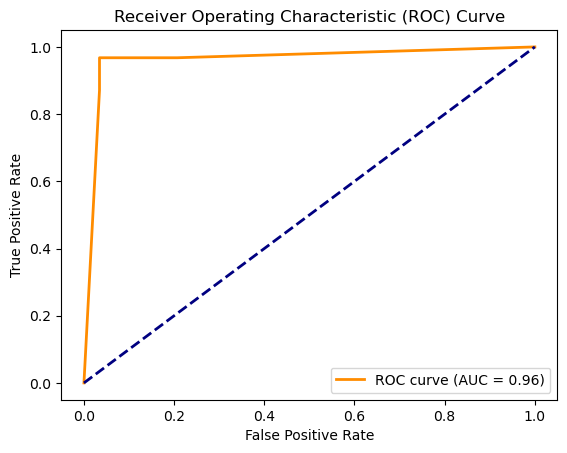

In [15]:
# 5. Receiver Operating Characteristic (ROC) Curve
y_prob = knn_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


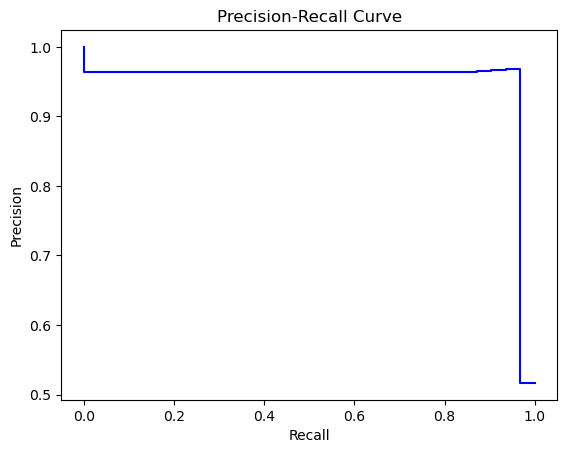

In [16]:
# 6. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.step(recall, precision, color='b', where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


<Figure size 640x480 with 0 Axes>

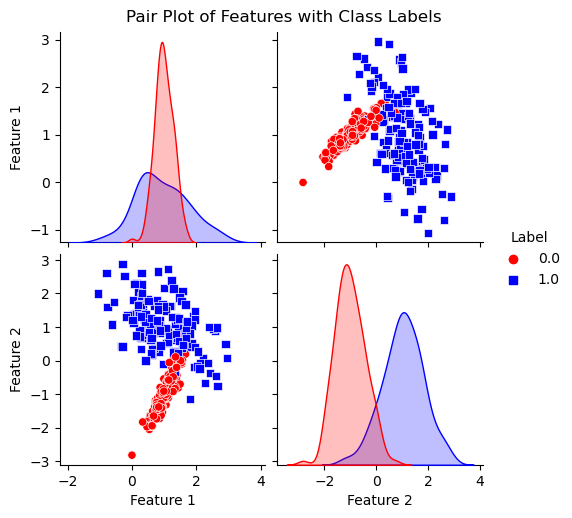

In [19]:
# Import seaborn for pair plot
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Combine features and labels into a DataFrame
data = np.column_stack((X, y))
columns = ['Feature 1', 'Feature 2', 'Label']
df = pd.DataFrame(data, columns=columns)

# 7. Pair Plot
plt.figure()
sns.pairplot(df, hue='Label', markers=['o', 's'], palette={0: '#FF0000', 1: '#0000FF'})
plt.suptitle('Pair Plot of Features with Class Labels', y=1.02)
plt.show()
